<a href="https://colab.research.google.com/github/nicorunini/CCMACLRL_EXERCISES_COM232/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

Display the first 5 rows of the dataset using `.head()`

In [4]:
df = pd.read_csv('personality.csv')

Display the summary of all the features of the dataset using `.info()`

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         100 non-null    object
 1   PostNShares  100 non-null    int64 
 2   Status       100 non-null    int64 
 3   Replies      100 non-null    int64 
 4   Followers    100 non-null    int64 
 5   Personality  100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [6]:
missing = df[df.isna().any(axis=1)]
missing

,Name,PostNShares,Status,Replies,Followers,Personality


Display the total number of samples from each label using `.value_counts()`

In [7]:
df['Personality'].value_counts()

,count
Personality,
1,53
0,47


Use a histogram to display the number of followers for each samples
 - The x axis should be the number of followers/friends
 - The y axis should be the number of samples in the dataset

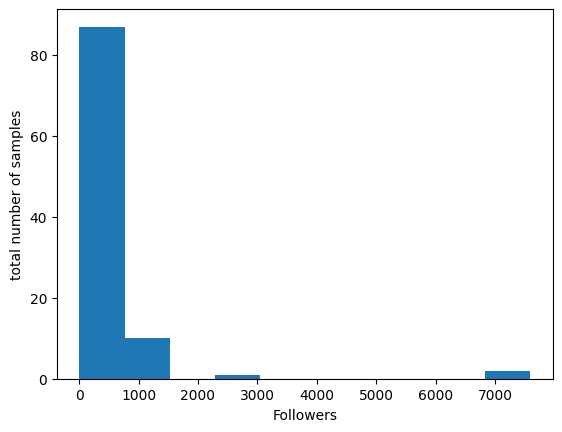

In [8]:
plt.hist(df["Followers"])
plt.xlabel("Followers")
plt.ylabel("total number of samples")
plt.show()

## C. Split the dataset into training and test set

Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [9]:
X = df.drop(columns=['Name','Personality']).values

Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [10]:
y = df['Personality'].values

Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=5)


Display the dimensions of each variables using `.shape()`

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80, 4)
(80,)
(20, 4)
(20,)


## D. Create the model

Use KNN as a classifier by using `KNeighborsClassifier()`

In [23]:
knn = KNeighborsClassifier()

Train the model using the `.fit()`

In [24]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

Test the model using the `.predict()`

In [25]:
y_pred = knn.predict(X_test)

## E. Evaluate the model

Create a confusion matrix

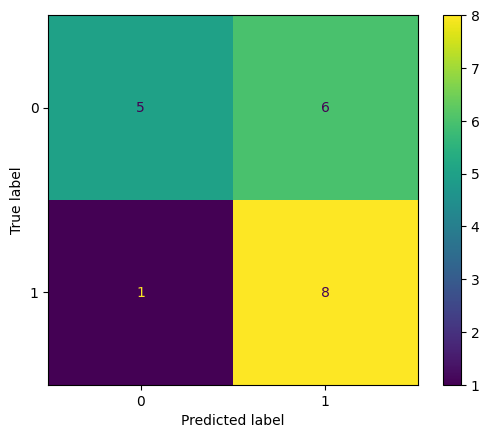

In [26]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

Display the accuracy

In [27]:
metrics.accuracy_score(y_test, y_pred)

0.65

Display the precision

In [18]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.4 0.8]


Display the recall

In [19]:
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0.66666667 0.57142857]


Display the f1-score

In [20]:
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.5        0.66666667]


## F. Predict your own personality

Enter your own features and use the model to generate a prediction using `.predict()`

In [21]:
knn.predict([[1,1,1000,0]])

array([0])